In [1]:
%run code/helloUCLH.py


Hello Niall



Shall I continue?  yes




EMAP has been built

    ... here at UCLH

    ... for the NHS

according to the following principles ...


1. Protection of operational systems
2. Protection of patient privacy:
   A 'code to data' rather than 'data to code' paradigm
3. Near real-time over retrospective batch loads
4. Interoperability for semantic collaboration
5. Scalable through open source

Thank you and goodbye



In [3]:
%run code/ids_demo.py

In [5]:
DSN

'host=172.16.149.131 dbname=ids_live user=ids_admin password=ids_admin port=5432'

In [6]:
conn = psycopg2.connect(DSN)

In [7]:
conn.get_dsn_parameters()

{'user': 'ids_admin',
 'dbname': 'ids_live',
 'host': '172.16.149.131',
 'port': '5432',
 'tty': '',
 'options': '',
 'sslmode': 'prefer',
 'sslcompression': '0',
 'krbsrvname': 'postgres',
 'target_session_attrs': 'any'}

In [8]:
cursor = conn.cursor()
cursor.execute('SELECT version();')
record = cursor.fetchone()
print(record)

('PostgreSQL 9.6.10 on x86_64-pc-linux-gnu, compiled by gcc (GCC) 4.8.5 20150623 (Red Hat 4.8.5-28), 64-bit',)


In [11]:
cursor = conn.cursor()
cursor.execute('SELECT * from tbl_ids_master LIMIT 5;')
record = cursor.fetchall()
print(record)

[(180265, 'HILARY', 'LYNNE', 'BLOOM', datetime.datetime(1950, 7, 28, 0, 0), '4446618571', '01000457', 'S', '1TRFR', datetime.datetime(2018, 12, 13, 0, 0), None, 'ADT^A04', 'ADTOUT', 'PLW21241146100304782', 'HL7', '2.2', datetime.datetime(2018, 12, 13, 11, 36), 'MSH|^~\\&|ADTOUT|PLW|||201812131136||ADT^A04|PLW21241146100304782|P|2.2|||AL|NE\nEVN|A04|201812131136||RECEP|U519286^GREEN^DOSMA\nPID||4446618571|01000457^^^MRENTR^MEDREC||BLOOM^HILARY^LYNNE^^MRS||195007280000|F||A|231 EDGWAREBURY LANE,^EDGWARE, MIDDX^^^HA8 8QJ||8958 2469~07740 425 727~HILARYBLOOM@HOTMAIL.COM|||M|9A|8402805\nPD1|||U|412527^PINTO^ZA^^^DR^^^^^^^^G8807346~E830301^PENSHURST GARDENS SURGERY^39 PENSHURST GARDENS^EDGWARE^MIDDLESEX^^^HA8 9TN^^020 8958 3141^020 8905 4638^^^E83030&1||N||N\nPV1||S|1TRFR||||H9999998^TECHNICIAN^RNTNE|412527^PINTO^ZA^^^DR~X9999998^SELF-REFERRAL^A||840EH|||||||R518465^1TRFR^THU WKA R1|X|16055260||||||||||||||||||||FM||2|||201812130000||||||38337093\nPV2|||||||V|201812131000|201812131136||||5\n

In [13]:
import pandas as pd
SQL = 'SELECT * from tbl_ids_master LIMIT 5;'
df = pd.read_sql(SQL, conn)


In [14]:
df

,unid,patientname,patientmiddlename,patientsurname,dateofbirth,nhsnumber,hospitalnumber,patientclass,patientlocation,admissiondate,dischargedate,messagetype,senderapplication,messageidentifier,messageformat,messageversion,messagedatetime,hl7message,persistdatetime
0,180265,HILARY,LYNNE,BLOOM,1950-07-28,4446618571,01000457,S,1TRFR,2018-12-13,NaT,ADT^A04,ADTOUT,PLW21241146100304782,HL7,2.2,2018-12-13 11:36:00,MSH|^~\&|ADTOUT|PLW|||201812131136||ADT^A04|PL...,2018-12-13 11:40:00.670
1,180266,LATISHA,JOYCE,HUNTE,1993-02-26,4401671422,40961894,S,DCL4A,2013-11-13,NaT,ADT^A04,ADTOUT,PLW21241146100397665,HL7,2.2,2018-12-13 11:36:00,MSH|^~\&|ADTOUT|PLW|||201812131136||ADT^A04|PL...,2018-12-13 11:40:01.638
2,180267,TANYA,None,ZIV,1983-02-25,7076504383,41614355,S,1MWD1,2018-06-12,NaT,ADT^A04,ADTOUT,PLW21241146100526792,HL7,2.2,2018-12-13 11:36:00,MSH|^~\&|ADTOUT|PLW|||201812131136||ADT^A04|PL...,2018-12-13 11:40:02.947
3,180268,DORA,None,RUBINFELD,1938-01-07,7049439339,40740081,S,OA13D,2014-01-28,2014-09-05,ADT^A31,ADTOUT,PLW21241146100705315,HL7,2.2,2018-12-13 11:36:00,MSH|^~\&|ADTOUT|PLW|||201812131136||ADT^A31|PL...,2018-12-13 11:40:04.777
4,180269,CLARE,None,WARREN,1975-09-24,4261481162,95052374,S,GMB4A,2008-11-25,NaT,ADT^A04,ADTOUT,PLW21241146100809072,HL7,2.2,2018-12-13 11:36:00,MSH|^~\&|ADTOUT|PLW|||201812131136||ADT^A04|PL...,2018-12-13 11:40:05.810


In [43]:
import pandas as pd
import numpy as np
import altair as alt

In [48]:
SQL = 'SELECT messagetype, senderapplication, messagedatetime, persistdatetime from tbl_ids_master LIMIT 100000;'
df = pd.read_sql(SQL, conn)
df['msg_delay'] = (df['persistdatetime'] - df['messagedatetime']) / np.timedelta64(1, 's')
print(df.head())

  messagetype senderapplication     messagedatetime         persistdatetime  \
0     ADT^A04            ADTOUT 2018-12-19 11:17:00 2018-12-19 11:20:38.461   
1     ADT^A04            ADTOUT 2018-12-19 11:17:00 2018-12-19 11:20:39.764   
2     ADT^A31            ADTOUT 2018-12-19 11:17:00 2018-12-19 11:20:41.395   
3     ADT^A31            ADTOUT 2018-12-19 11:17:00 2018-12-19 11:20:42.048   
4     ADT^A04            ADTOUT 2018-12-19 11:17:00 2018-12-19 11:20:42.441   

   msg_delay  
0    218.461  
1    219.764  
2    221.395  
3    222.048  
4    222.441  


In [51]:
alt.data_transformers.enable('json')
chart = alt.Chart(df)

In [ ]:
chart.mark_bar().encode(
    x='messagedatetime',
    y='msg_delay')

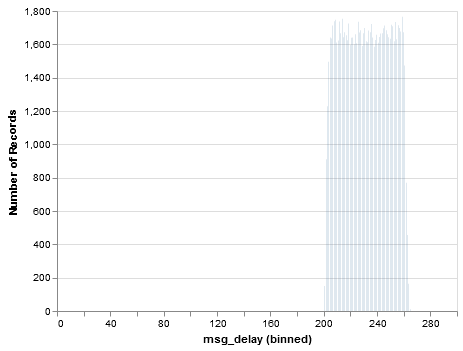

In [58]:
chart.mark_bar(
    opacity=0.5
).encode(
    alt.X(
        'msg_delay:Q', 
        bin=alt.Bin(maxbins=100),
        scale=alt.Scale(domain=[0, 300])
         ),
    y='count()',
)

In [69]:
SQL = "SELECT messagetype, senderapplication, messagedatetime from tbl_ids_master WHERE messagetype = 'ADT^A01';"
df = pd.read_sql(SQL, conn)

In [70]:
len(df)

29991

In [73]:
df['time_of_day'] = df['messagedatetime'].dt.time
df.head()

,messagetype,senderapplication,messagedatetime,time_of_day
0,ADT^A01,ADTOUT,2018-12-27 12:47:00,12:47:00
1,ADT^A01,ADTOUT,2018-12-27 12:47:00,12:47:00
2,ADT^A01,ADTOUT,2018-12-27 12:48:00,12:48:00
3,ADT^A01,ADTOUT,2018-12-27 12:50:00,12:50:00
4,ADT^A01,ADTOUT,2018-12-27 12:51:00,12:51:00


In [91]:
df['hour'] = df['messagedatetime'].dt.hour
sum(df['hour'] == 0)

305

In [94]:
dfg = df.groupby(['hour']).size().reset_index(name='counts')

/usr/local/lib/python3.7/site-packages/altair/utils/core.py:294: FutureWarning: A future version of pandas will default to `skipna=True`. To silence this warning, pass `skipna=True|False` explicitly.
  attrs['type'] = infer_vegalite_type(data[attrs['field']])


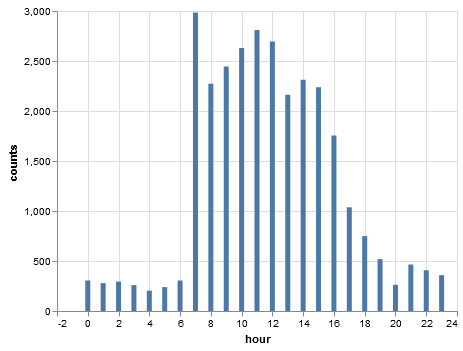

In [95]:
chart = alt.Chart(dfg)
chart.mark_bar().encode(
    x='hour',
    y='counts')